In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [5]:
df = pd.read_csv("houseprice.csv")

# df['Area'] = df['Area'].str.replace('"', '').astype(float
# pd.to_numeric(df["Area"], downcast='int')
# df['Area'] = df['Area'].astype(float)

df['Area'] = pd.to_numeric(df['Area'], errors='coerce') #به صورت دیفالت اگه رشته انقدر بزگ باشه (بالای 1000) مساوی نال میذاره 
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


In [6]:
df["Area"].dtype

dtype('float64')

In [7]:
df = df.sort_values(by=['Area'] ,  ascending=True)  #sort
df = df.dropna() # delet nulls
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3211,30.0,0,False,True,False,Ostad Moein,5.000000e+08,16666.67
2321,32.0,1,False,True,False,Hashemi,6.100000e+08,20333.33
2324,32.0,1,False,True,True,Eskandari,9.400000e+08,31333.33
2783,33.0,1,False,True,False,Beryanak,5.600000e+08,18666.67
2307,35.0,1,False,True,False,Salsabil,6.600000e+08,22000.00
...,...,...,...,...,...,...,...,...
3115,750.0,5,True,True,False,Varamin - Beheshti,3.500000e+09,116666.67
831,750.0,5,True,True,True,Mahmoudieh,7.500000e+10,2500000.00
573,863.0,2,True,True,True,Gheitarieh,7.830000e+09,261000.00
1974,900.0,3,True,True,False,Damavand,8.500000e+09,283333.33


In [8]:
df = df.replace(True,1)
df = df.replace(False,0)

In [9]:
cdf = df[["Area","Room",'Parking','Warehouse','Elevator',"Price"]]
cdf = cdf.sort_values(by=['Price'] ,  ascending=True)  #sort
cdf

,Area,Room,Parking,Warehouse,Elevator,Price
136,160.0,1,0,0,0,3.600000e+06
2770,83.0,2,1,1,1,5.500000e+07
731,75.0,2,1,1,1,6.000000e+07
2721,110.0,0,1,1,1,1.020000e+08
2201,49.0,1,1,1,0,1.100000e+08
...,...,...,...,...,...,...
1332,350.0,4,1,1,1,8.050000e+10
819,680.0,5,1,1,0,8.160000e+10
430,400.0,5,1,1,0,8.500000e+10
1810,705.0,5,1,1,0,9.100000e+10


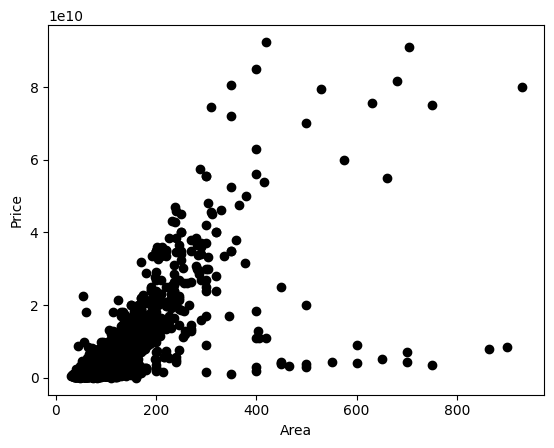

In [10]:
plt.scatter(cdf.Area, cdf.Price,  color='black')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)          # ضرایب x1 , x2, x3
print ('intercept_: ', regr.intercept_)     # عذذ ثابت

Coefficients:  [[ 6.78374535e+07  1.74803202e+09 -5.52731930e+07  1.22320021e+09
   1.07703056e+09]]
intercept_:  [-7.46943983e+09]


## Predeict the price

In [13]:
y_hat= regr.predict(test[['Area','Room','Parking','Warehouse','Elevator']])
x = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator']])
y = np.asanyarray(test[['Price']])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))


Residual sum of squares: 30021341607631970304.00
Variance score: 0.58


C:\Users\Amin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
